## Introduction to the Interstellar Medium
### Jonathan Williams

### Figure 11.2: surface density of atomic and molecular gas in M51 (NGC 5194)

#### data from Bigiel et al. 2008 Figure 2 (https://ui.adsabs.harvard.edu/abs/2008AJ....136.2846B/abstract)
#### digitized using https://apps.automeris.io/wpd/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d as smooth
from scipy import integrate
%matplotlib inline

M_HI = 2.4e+09 Msun
M_H2 = 1.5e+10 Msun


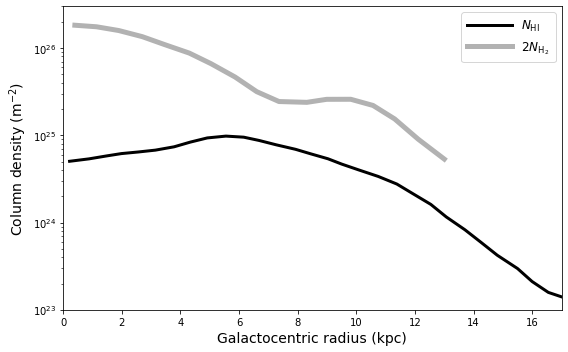

In [2]:
fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(111)

# HI profile, converted from Msun/pc^2 to column density of hydrogen per m^2
R_HI, Sigma_HI = np.genfromtxt('M51_HI_surface_density.txt', unpack=True, delimiter=',')
N_HI = 1.25e24 * Sigma_HI
ax1.plot(R_HI, smooth(N_HI,sigma=1.5), 'k-', lw=3, label=r'$N_{\rm HI}$')

# H2 profile
R_H2, Sigma_H2 = np.genfromtxt('M51_H2_surface_density.txt', unpack=True, delimiter=',')
N_H2 = 1.25e24 * Sigma_H2
ax1.plot(R_H2, smooth(N_H2,sigma=1.5), 'k-', lw=5, alpha=0.3, label=r'$2N_{\rm H_2}$')

# look at the ratio of molecular to atomic
from scipy.interpolate import interp1d
f = interp1d(R_HI, Sigma_HI, kind='cubic')
ratio = Sigma_H2/f(R_H2)
#print(ratio)
#ax1.plot(R_H2, ratio*1e24, 'b--', lw=3, alpha=0.7, label=r'H$_2$/HI')

ax1.set_xlim(0,17)
ax1.set_ylim(1e23,3e26)
ax1.set_yscale('log')
ax1.set_xlabel("Galactocentric radius (kpc)", fontsize=14)
ax1.set_ylabel(r"Column density (m$^{-2}$)", fontsize=14)

# get total masses in Msun
M_HI = 1e6*integrate.simps(2*np.pi*R_HI*Sigma_HI, R_HI)
M_H2 = 1e6*integrate.simps(2*np.pi*R_H2*Sigma_H2, R_H2)
print('M_HI = {0:7.1e} Msun'.format(M_HI))
print('M_H2 = {0:7.1e} Msun'.format(M_H2))

# exponential comparison
'''
r = np.linspace(1,20,5)
r0 = 3.75
f = np.exp(-r/r0)
ax1.plot(r, 2.5e26*f, 'r--')
'''

ax1.legend(handlelength=3.7, borderpad=0.5, labelspacing=0.5, fontsize='large', loc=1)
fig.tight_layout(rect=[0.0,0.0,1.0,1.0]) 
plt.savefig('M51_HI_CO_profile.pdf')